# Midterm DSC160

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

import librosa
import librosa.display

from IPython.display import Audio

import requests
import os

import sklearn
import numpy as np

import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# AUDIO FEATURES EXTRACTION
including: CHROMA, spectral centroid, spectral bandwidth, spectral roll off, and zero crossing rate

In [175]:
def extract_features(filename):
    y, sr = librosa.load(filename)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)

    features = [np.mean(spec_cent), np.mean(spec_bw), \
                np.mean(rolloff), np.mean(zcr)]
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)
    features.append(chroma_stft.mean())
    features.append(mfcc.mean())

    return features

In [176]:
AUDIO_DIR = '../data'
rows_list = []
for directory in os.listdir(AUDIO_DIR):
    dirpath = os.path.join(AUDIO_DIR, directory)
    if os.path.isdir(dirpath):
        for filename in os.listdir(dirpath):
            if filename.endswith(".mp3"):
                stats_dict = {}
                feats = extract_features(os.path.join(AUDIO_DIR, directory, filename))
                spec_cent, spec_bw, rolloff, zcr = feats[:4]
                chroma = feats[4]
                mfccs = feats[5]
                
                stats_dict['chroma mean'] = chroma
                stats_dict['mfcc mean'] = mfccs
                stats_dict['filename'] = filename
                stats_dict['political era'] = directory
                stats_dict['spec_cent'] = spec_cent
                stats_dict['spec_bw'] = spec_bw
                stats_dict['rolloff'] = rolloff
                stats_dict['zcr'] = zcr
                rows_list.append(stats_dict)

summary_stats = pd.DataFrame(rows_list)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/libros

In [284]:
summary_stats = summary_stats.sort_values('political era').set_index('political era')
df = summary_stats[['filename', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'chroma mean', 'mfcc mean']]    
df

,filename,spec_cent,spec_bw,rolloff,zcr,chroma mean,mfcc mean
political era,,,,,,,
1910-1945s,이난영 목포의 눈물 Lee Nan Young Tears Of Mokpo 1960년때...,992.931127,1301.385055,1548.910973,0.049977,0.215802,-11.166434
1910-1945s,[FMV] 희망가 (Song of Hope) - 안치환 지창욱 (Ji Chang W...,1440.512649,1968.408364,2841.607976,0.058026,0.281142,1.141171
1910-1945s,"윤심덕, 사의 찬미(1926).mp3",933.175814,627.061254,1405.590355,0.067421,0.199858,-35.773403
1910-1945s,Park Hyang-rim Oppaneun Punggakjaengiya (Old K...,1492.228172,1329.512325,2793.198282,0.093577,0.284070,-13.502458
1940s-1950s,남인수 - 가거라 삼팔선 (Nam In Soo - Vanish 38th Parall...,2271.073759,2184.591999,4255.128511,0.121422,0.267921,-11.836088
1940s-1950s,Guitar Boogie.mp3,2288.070312,2239.812816,4605.931628,0.105259,0.296306,-8.035512
1940s-1950s,Korean Trot - Be strong! Keumsun! (굳세어라 금순아).mp3,2915.319723,2482.976328,5516.443498,0.159637,0.323916,-1.933329
1940s-1950s,Korean Trot - Farewell in Busan Station (이별의 부...,1855.866584,2037.132950,3785.804315,0.093264,0.332803,-1.208215
1960s,김추자 - 님은 먼 곳에 (1969).mp3,1779.014782,2095.400349,3533.704026,0.085437,0.287805,-1.367057


In [178]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [179]:
just_stats = summary_stats[['chroma mean', 'mfcc mean', 'zcr', 'spec_bw', 'spec_cent', 'rolloff']]

In [180]:
scaled_stats = scaler.fit_transform(just_stats)

In [181]:
col_names = ['chroma mean', 'mfcc mean', 'zcr', 'spec_bw', 'spec_cent', 'rolloff']

scaled_stats = pd.DataFrame(scaled_stats, columns = col_names)
scaled_stats['political era'] = summary_stats.index
scaled_stats.head()
groups = scaled_stats.groupby('political era')

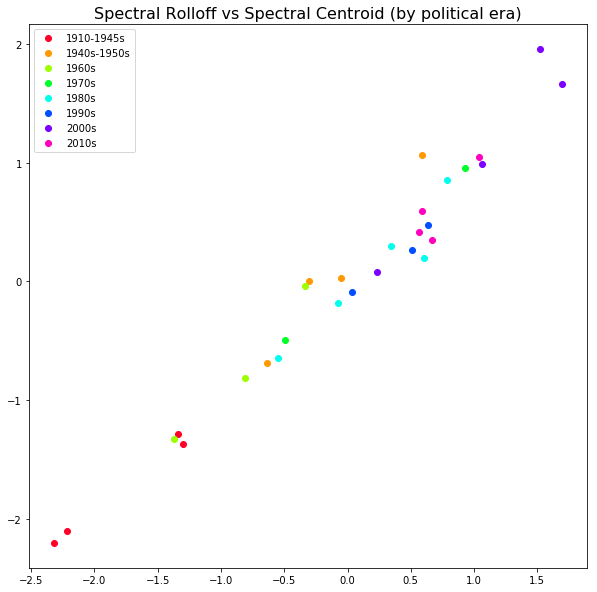

In [196]:
fig, ax = plt.subplots(figsize=(10,10))
colors = iter(plt.cm.gist_rainbow(np.linspace(0, 1, len(groups))))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.rolloff, group.spec_cent, marker='o', linestyle='', label=name, color=next(colors))
ax.legend()
plt.title('Spectral Rolloff vs Spectral Centroid (by political era)', fontsize=16);
plt.show()

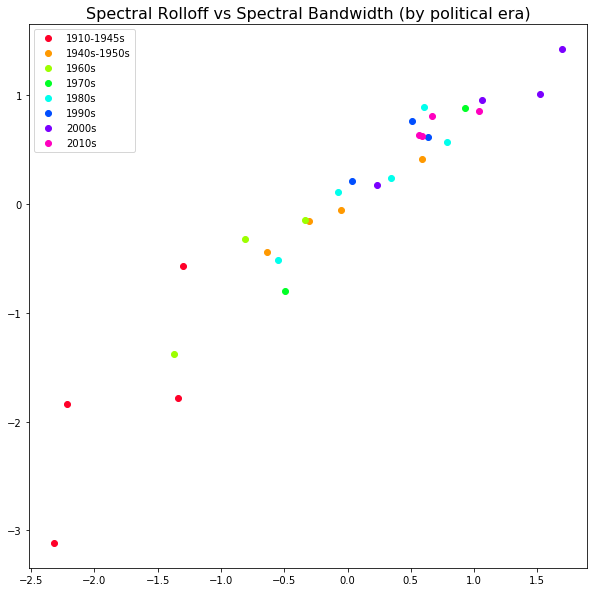

In [198]:

fig, ax = plt.subplots(figsize=(10,10))
colors = iter(plt.cm.gist_rainbow(np.linspace(0, 1, len(groups))))
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.rolloff, group.spec_bw, marker='o', linestyle='', label=name, color=next(colors))
ax.legend()
plt.title('Spectral Rolloff vs Spectral Bandwidth (by political era)', fontsize=16);
plt.show()

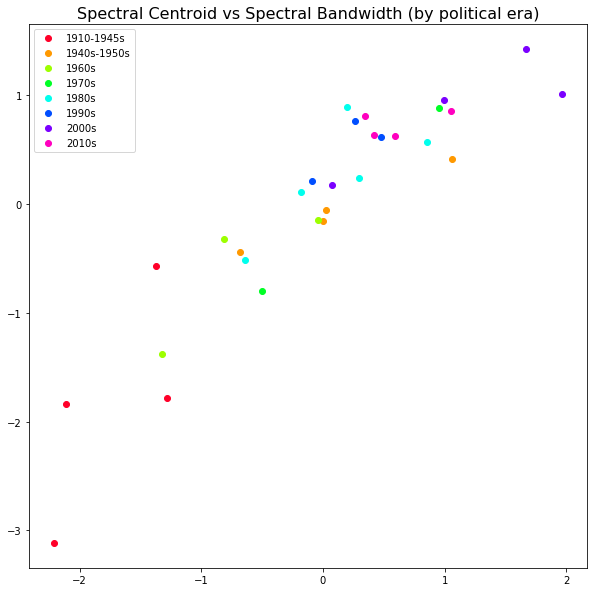

In [199]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) 
colors = iter(plt.cm.gist_rainbow(np.linspace(0, 1, len(groups))))
for name, group in groups:
    ax.plot(group.spec_cent, group.spec_bw, marker='o', linestyle='', label=name, color=next(colors))
ax.legend()
plt.title('Spectral Centroid vs Spectral Bandwidth (by political era)', fontsize=16);
plt.show()

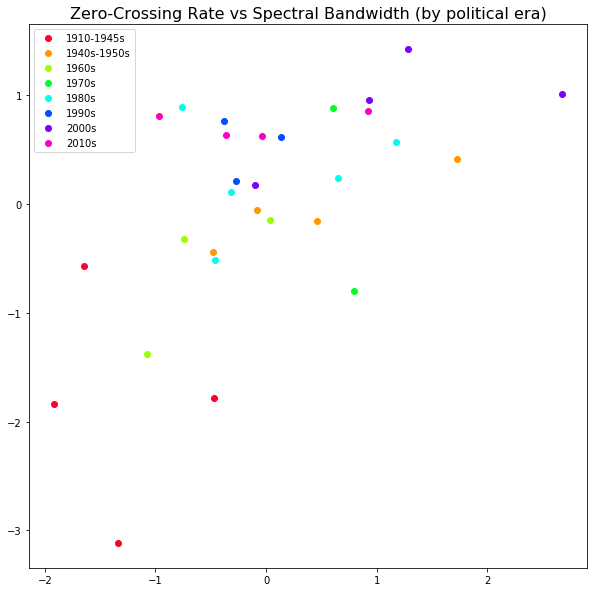

In [200]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) 
colors = iter(plt.cm.gist_rainbow(np.linspace(0, 1, len(groups))))
for name, group in groups:
    ax.plot(group.zcr, group.spec_bw, marker='o', linestyle='', label=name, color=next(colors))
ax.legend()
plt.title('Zero-Crossing Rate vs Spectral Bandwidth (by political era)', fontsize=16);
plt.show()

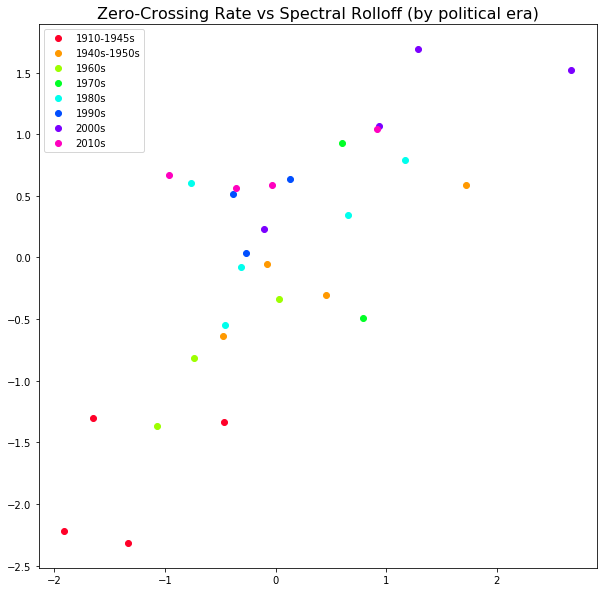

In [201]:
fig, ax = plt.subplots(figsize=(10,10))
colors = iter(plt.cm.gist_rainbow(np.linspace(0, 1, len(groups))))
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.zcr, group.rolloff, marker='o', linestyle='', label=name, color=next(colors))
ax.legend()
plt.title('Zero-Crossing Rate vs Spectral Rolloff (by political era)', fontsize=16);
plt.show()

In [204]:
temp = summary_stats.reset_index()
df = temp.groupby('political era').mean()

In [205]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,20)

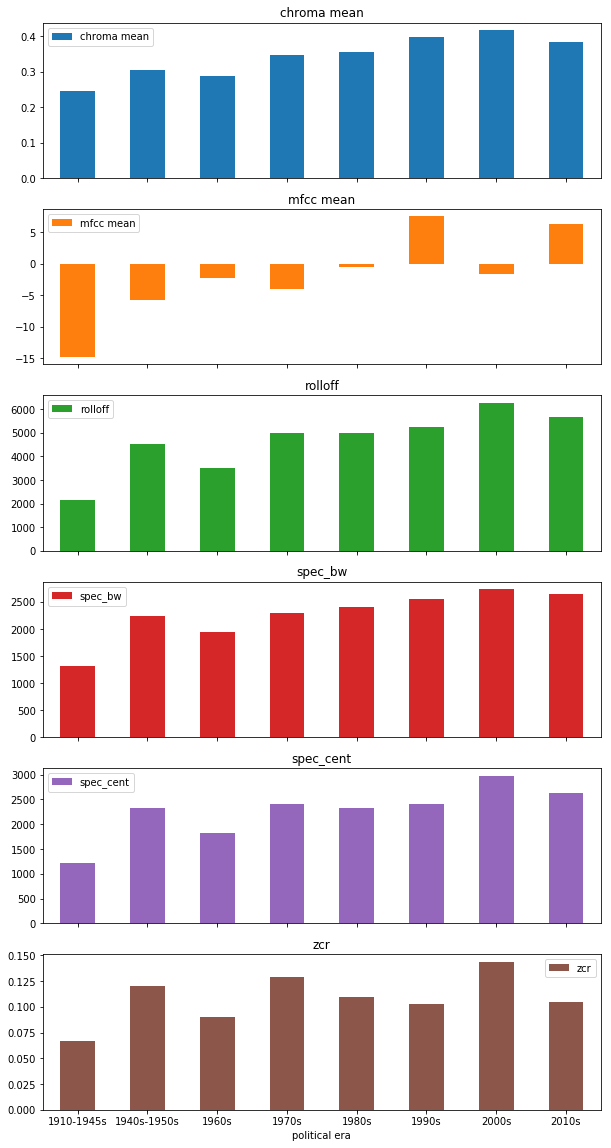

In [206]:
axes = df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

In [ ]:
#Notice that 1945-1950s are simliar 
#lets look at that 

In [207]:
#looking into the ability to use mfcc to indicate differences in 1950s and 1970s songs
#expect low quality predictor 
scaler = sklearn.preprocessing.StandardScaler()

In [326]:
#scale each song 
def scale_and_fit(mfcc_list):
    mfcc_scaled = [] 
    
    for i in mfcc_list: 
        scale = i.T
        mfcc_scaled.append(scaler.fit_transform(scale))
        
    return mfcc_scaled
    

In [327]:
#grouping songs 
mfcc_1940 = [mfcc_songhope, mfcc_oppaneun, mfcc_hymn, mfcc_mokpo]
mfcc_1950 = [mfcc_boogie, mfcc_strong, mfcc_busan, mfcc_vanish]
mfcc_1960 = [mfcc_away, mfcc_camellia, mfcc_pearl]
mfcc_1970 = [mfcc_world,mfcc_water ]
mfcc_1980 = [mfcc_night, mfcc_hair,mfcc_electro,  mfcc_nami, mfcc_missing]
mfcc_1990 = [mfcc_candy,mfcc_girl, mfcc_home]
mfcc_2000 = [mfcc_eat,mfcc_la, mfcc_rain, mfcc_miro]
mfcc_2010 = [mfcc_dna,mfcc_cry, mfcc_exo, mfcc_tt]

In [328]:
#get scaled 
mfcc_scaled = scale_and_fit(mfcc_1950)+ scale_and_fit(mfcc_1970)

len(mfcc_scaled)

6

In [329]:
#make predictor model for songs 

features = None
songs = iter(np.arange(0, 6))
model = sklearn.svm.SVC()
labels = []
for scale in mfcc_scaled:
    song = next(songs)
    labels = np.concatenate((labels, np.array([song for i in range(len(scale))])))

features = np.vstack(mfcc_scaled )
    

model.fit(features, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [340]:
#grabs features/labels to test from given files 
def test_prediction(filenames, dur, off):
    lst = [] 
    labels = []
    songs = iter(np.arange(0, len(filenames)))
    for i in filenames:
        x, fs = librosa.load(i, duration=dur, offset=off)
        song = next(songs)
        mfcc = librosa.feature.mfcc(x, sr=fs, n_mfcc=12)
        mfcc_scale = scale_and_fit([mfcc])
        lst.append(mfcc_scale[0])
        labels = np.concatenate((labels, np.array([song for i in range(len(mfcc_scale[0]))])))
    features = np.vstack(lst )
    return  features, labels 
        

In [341]:
#1950s/1970s files 
a = '../data/1940s-1950s/' + df.loc['1940s-1950s']['filename']
b = '../data/1970s/' + df.loc['1970s']['filename']
test_files = a.append( b)
test_files

political era
1940s-1950s    ../data/1940s-1950s/남인수 - 가거라 삼팔선 (Nam In Soo ...
1940s-1950s                ../data/1940s-1950s/Guitar Boogie.mp3
1940s-1950s    ../data/1940s-1950s/Korean Trot - Be strong! K...
1940s-1950s    ../data/1940s-1950s/Korean Trot - Farewell in ...
1970s          ../data/1970s/한대수(Han, Dae-Soo) - 물좀 주소(Give m...
1970s          ../data/1970s/Han dae soo - To The Happy World...
Name: filename, dtype: object

In [342]:
#predict using 10 sec clips from the songs 
features_t, labels_t = test_prediction(test_files, 10, 120)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/libros

In [345]:
predictions = model.predict(features_t)

In [344]:
#got low score 
score = model.score(features_t, labels_t)
score

0.14037122969837587

In [350]:
#get sec in time 
SEC_OF_TIME = 22050/ 512
time = np.arange(1, len(predictions)+1) / SEC_OF_TIME

In [351]:
#simplyfying labels 
#instead of some name, by year 
func = lambda y : '1945-1950s'if y  < 4 else '1970s'
predict = [func(i) for i in predictions]

In [354]:

df_p = pd.DataFrame({'Predicted Label': predict, 'Time Frame (Second in Song)': time})
df_p['Time Frame (Second in Song)'] = df_p['Time Frame (Second in Song)'].apply(lambda x: round(x, 2))

In [355]:
five_SEC = 216
one_SEC = 43
SAMPLE_SEC = 22050

In [366]:
#make predictive plots 
import seaborn as sns
def plot_compare(df, x_exo, fs_exo, name):
    sns.set(style="ticks", color_codes=True, rc={'figure.figsize':(14,5)})
    ax = sns.stripplot(x='Time Frame (Second in Song)', y='Predicted Label',data=df)
    plt.figure(figsize=(15, 5))
    librosa.display.waveplot(x_exo, sr=fs_exo)
    plt.title('Sample '+name)
    plt.tight_layout()
    #plt.plot(t,  predictions, color='r')
    plt.show()

In [367]:
#makes predictive plots from given files 
def load_x(df, filenames, dur, off):
    lst = [] 
    labels = []
    songs = iter(np.arange(0, len(filenames)))
    for i in filenames:
        x, fs = librosa.load(i, duration=dur, offset=off)
        plot_compare(df.head(round(2.5*one_SEC)), x[:round(SAMPLE_SEC *2.5)], fs, i)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


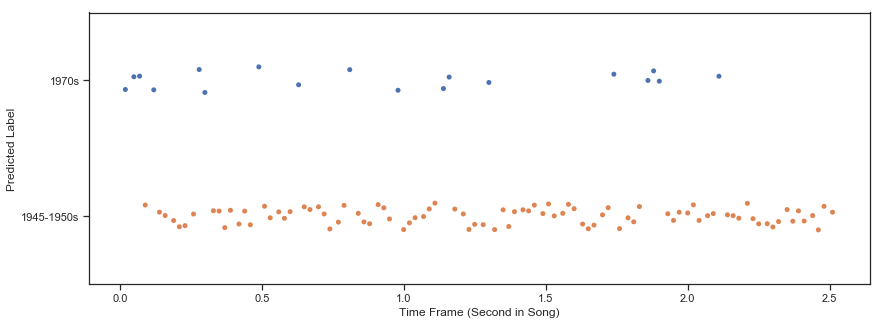

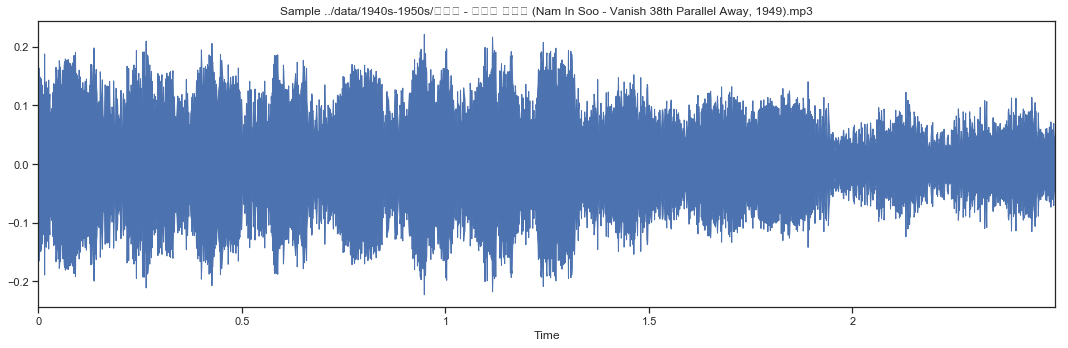

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


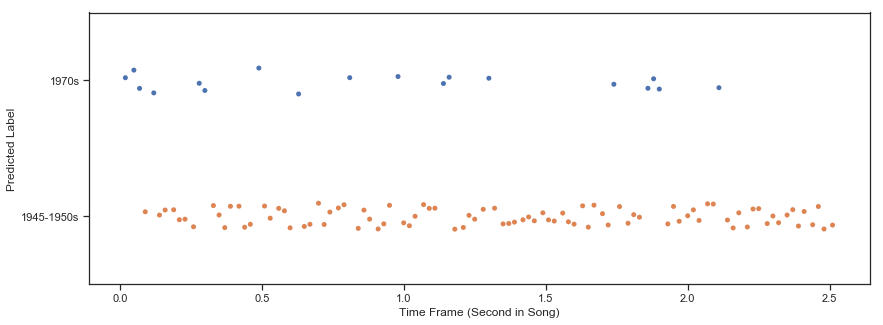

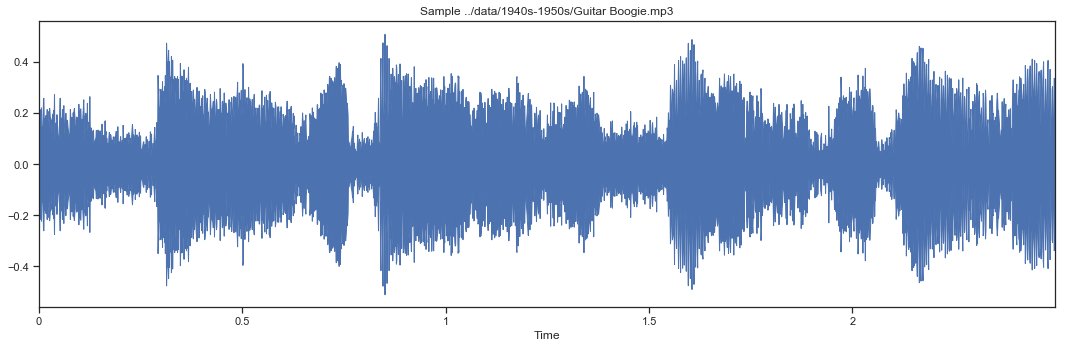

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


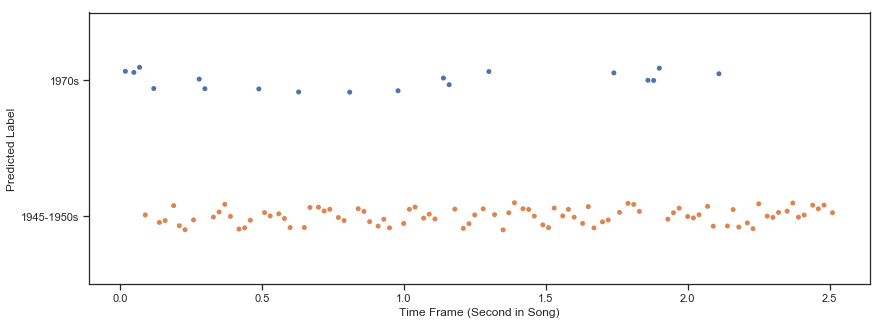

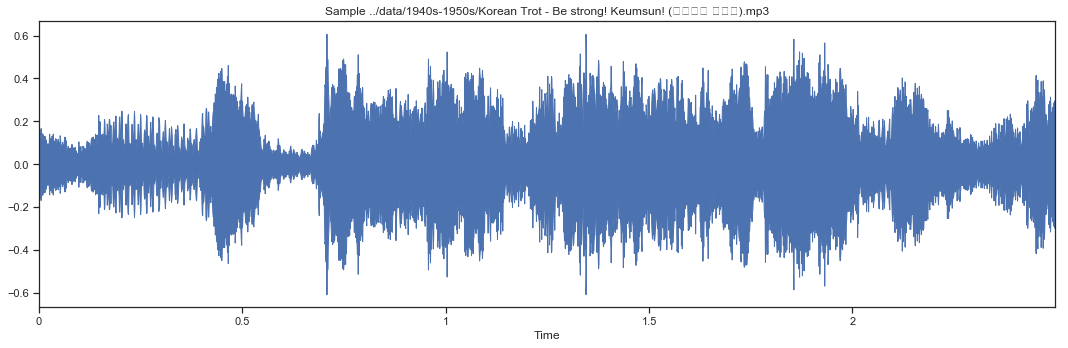

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


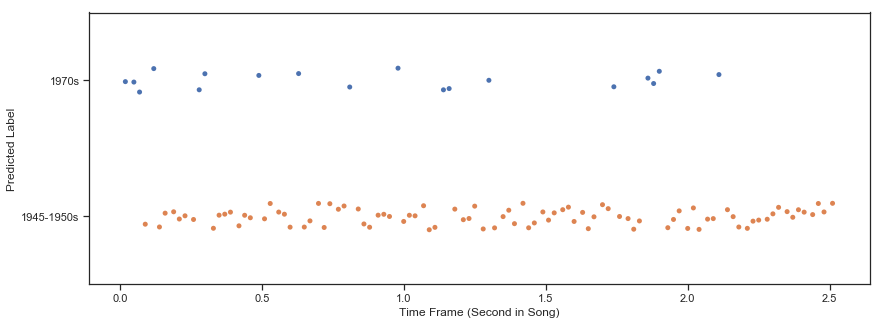

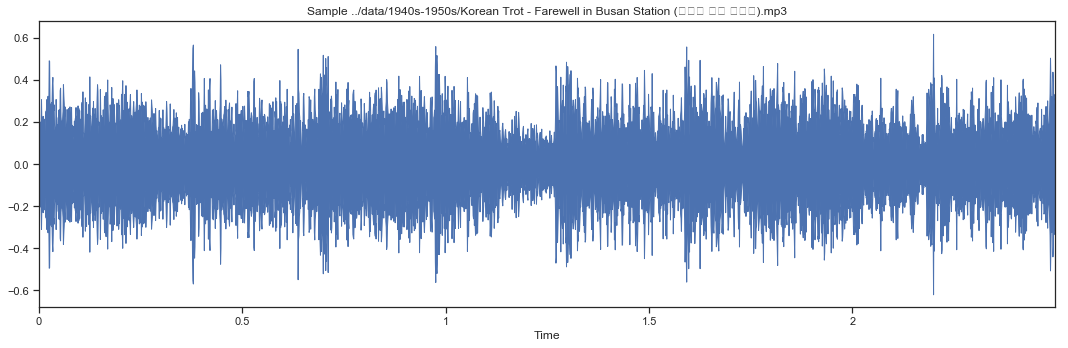

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


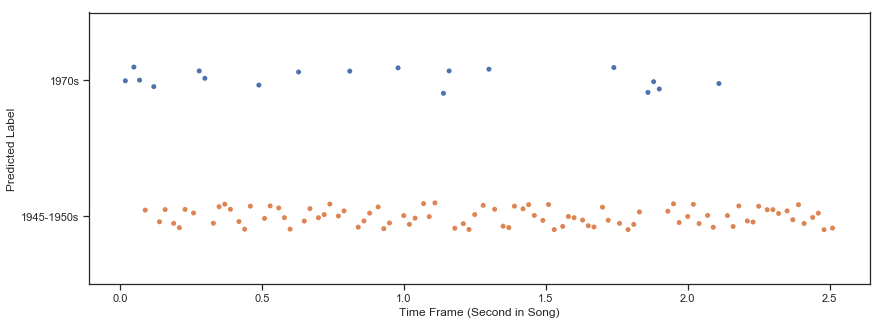

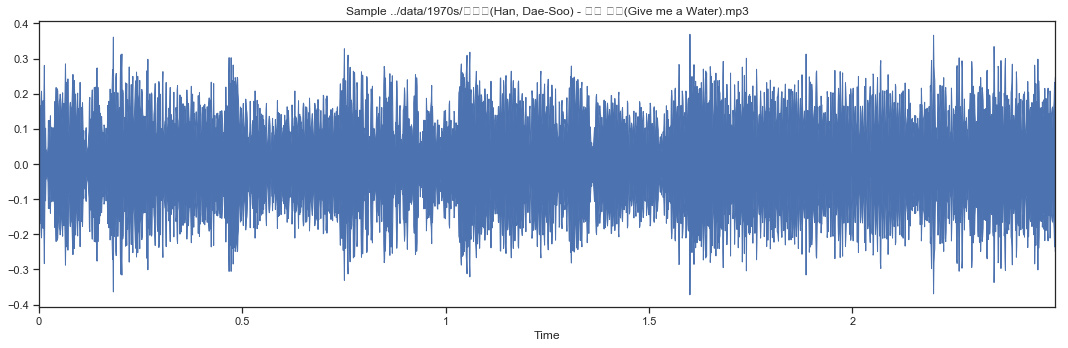

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


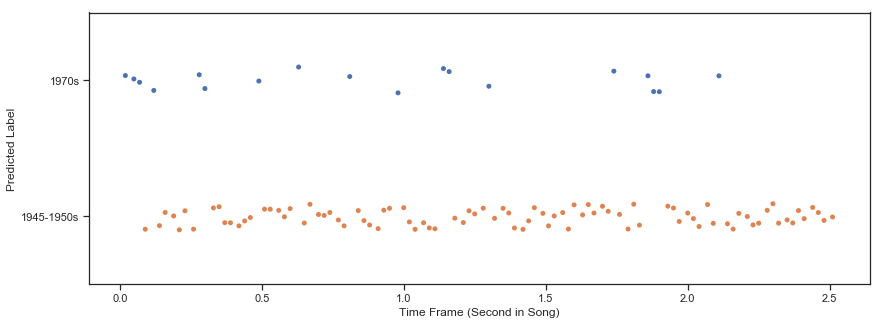

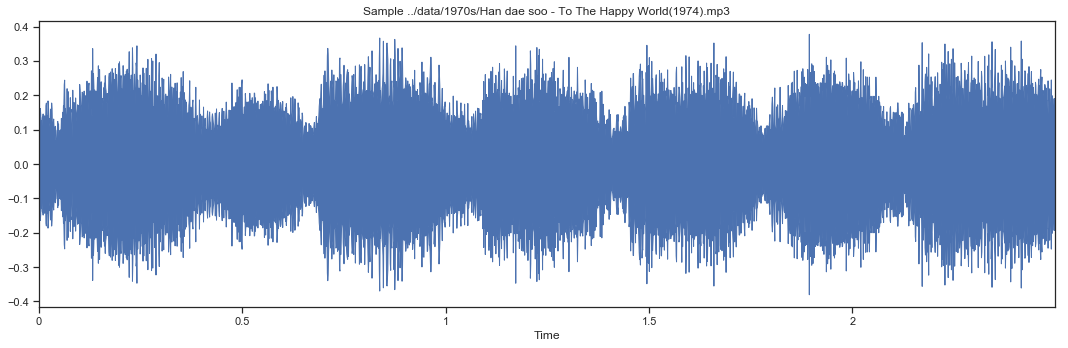

In [368]:
#showing the test predictor results
#However, by decades instead by song
load_x(df_p, test_files, 10, 120)